<font size="5">Intro info here</font>

In [33]:
# Import packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Display all columns in dataframes
pd.set_option('display.max_columns', None)


In [15]:
# Load datasets into dataframes

coffee_domestic_consumption_0 = pd.read_csv(r"C:\Users\Vanja\OneDrive\Desktop\Datasets\Coffee EDA\Coffee_domestic_consumption.csv")
coffee_export_0 = pd.read_csv(r"C:\Users\Vanja\OneDrive\Desktop\Datasets\Coffee EDA\Coffee_export.csv")
green_coffee_inventory_0 = pd.read_csv(r"C:\Users\Vanja\OneDrive\Desktop\Datasets\Coffee EDA\Coffee_green_coffee_inventorie.csv")
coffee_import_0 = pd.read_csv(r"C:\Users\Vanja\OneDrive\Desktop\Datasets\Coffee EDA\Coffee_import.csv")
import_consumption_0 = pd.read_csv(r"C:\Users\Vanja\OneDrive\Desktop\Datasets\Coffee EDA\Coffee_importers_consumption.csv")
coffee_production_0 = pd.read_csv(r"C:\Users\Vanja\OneDrive\Desktop\Datasets\Coffee EDA\Coffee_production.csv")
coffee_re_export_0 = pd.read_csv(r"C:\Users\Vanja\OneDrive\Desktop\Datasets\Coffee EDA\Coffee_re_export.csv")

<font size="5">Domestic Consumption info here</font>

In [16]:
# Lets take a small look at each dataframe

coffee_domestic_consumption_0.head(2)

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,1999/00,2000/01,2001/02,2002/03,2003/04,2004/05,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_domestic_consumption
0,Angola,Robusta/Arabica,1200000,1800000,2100000,1200000,1500000,600000,1200000,2400000,1800000,1200000,1200000,1200000,1200000,900000,900000,900000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,1800000,46500000
1,Bolivia (Plurinational State of),Arabica,1500000,1620000,1650000,1710000,1770000,1830000,1890000,1950000,1980000,2040000,2100000,2190000,2250000,2310000,2700000,2460000,2520000,2610000,2700000,2760000,2850000,2940000,3030000,3120000,3210000,3300000,3420000,3510000,3600000,3660000,75180000


In [17]:
# Lets get some basic information about each dataframe

coffee_domestic_consumption_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Country                     55 non-null     object
 1   Coffee type                 55 non-null     object
 2   1990/91                     55 non-null     int64 
 3   1991/92                     55 non-null     int64 
 4   1992/93                     55 non-null     int64 
 5   1993/94                     55 non-null     int64 
 6   1994/95                     55 non-null     int64 
 7   1995/96                     55 non-null     int64 
 8   1996/97                     55 non-null     int64 
 9   1997/98                     55 non-null     int64 
 10  1998/99                     55 non-null     int64 
 11  1999/00                     55 non-null     int64 
 12  2000/01                     55 non-null     int64 
 13  2001/02                     55 non-null     int64 
 

In [18]:
# Descriptive Statistics

coffee_domestic_consumption_0['Total_domestic_consumption'].describe()

count    5.500000e+01
mean     1.112487e+09
std      3.834783e+09
min      0.000000e+00
25%      9.586920e+06
50%      1.216200e+08
75%      5.897930e+08
max      2.782470e+10
Name: Total_domestic_consumption, dtype: float64

In [19]:
# Standardize columns names for ease of use; snake_case

coffee_domestic_consumption_0.columns
coffee_domestic_consumption_0 = coffee_domestic_consumption_0.rename(columns = {'Country': 'country', 
                                'Coffee type': 'coffee_type', 'Total_domestic_consumption': 'total_domestic_consumption'})
coffee_domestic_consumption_0.columns

Index(['country', 'coffee_type', '1990/91', '1991/92', '1992/93', '1993/94',
       '1994/95', '1995/96', '1996/97', '1997/98', '1998/99', '1999/00',
       '2000/01', '2001/02', '2002/03', '2003/04', '2004/05', '2005/06',
       '2006/07', '2007/08', '2008/09', '2009/10', '2010/11', '2011/12',
       '2012/13', '2013/14', '2014/15', '2015/16', '2016/17', '2017/18',
       '2018/19', '2019/20', 'total_domestic_consumption'],
      dtype='object')

In [20]:
# Check for missing values

coffee_domestic_consumption_0.isna().sum()

country                       0
coffee_type                   0
1990/91                       0
1991/92                       0
1992/93                       0
1993/94                       0
1994/95                       0
1995/96                       0
1996/97                       0
1997/98                       0
1998/99                       0
1999/00                       0
2000/01                       0
2001/02                       0
2002/03                       0
2003/04                       0
2004/05                       0
2005/06                       0
2006/07                       0
2007/08                       0
2008/09                       0
2009/10                       0
2010/11                       0
2011/12                       0
2012/13                       0
2013/14                       0
2014/15                       0
2015/16                       0
2016/17                       0
2017/18                       0
2018/19                       0
2019/20 

In [21]:
# Check for duplicates

coffee_domestic_consumption_0.duplicated().sum()

0

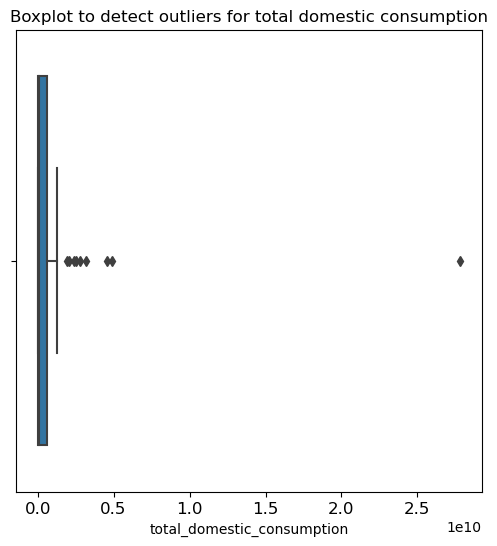

In [22]:
# Lets check for outliers

plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for total domestic consumption', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=coffee_domestic_consumption_0['total_domestic_consumption'])
plt.show()

In [23]:
# Identify subset of data containing outliers

percentile_25 = coffee_domestic_consumption_0['total_domestic_consumption'].quantile(0.25)
percentile_75 = coffee_domestic_consumption_0['total_domestic_consumption'].quantile(0.75)

# Compute Interquartile Range

iqr = percentile_75 - percentile_25

# Define upper and lower limits for non-outlier values

upper_lim = percentile_75 + 1.5*iqr
lower_lim = percentile_25 + 1.5*iqr
print("Lower limit:", lower_lim)
print("Upper limit:", upper_lim)

# Identify outlier subset

outliers = coffee_domestic_consumption_0[(coffee_domestic_consumption_0['total_domestic_consumption'] > upper_lim) | (coffee_domestic_consumption_0['total_domestic_consumption'] < lower_lim)]

print("Number of rows in the dataframe containing outliers in total_domestic_consumption: ", len(outliers))


Lower limit: 879896010.0
Upper limit: 1460102070.0
Number of rows in the dataframe containing outliers in total_domestic_consumption:  54


<font size="5">Outliers doesn't make sense.. only 56 rows of data in dataset</font>

In [35]:
# Look at countries with most domestic consumption

top_dom_consumption_countries = coffee_domestic_consumption_0[['country', 'total_domestic_consumption']]
top_dom_consumption_countries = top_dom_consumption_countries.sort_values(by='total_domestic_consumption', ascending=False).head(10)


In [47]:
# Lets graph the countries with the most domestic consumption

fig1 = px.bar(top_dom_consumption_countries, x = 'country', y = 'total_domestic_consumption', color = 'country',
                color_discrete_sequence = px.colors.qualitative.Safe, labels = {"country": "Country",
                "total_domestic_consumption": "Total Domestic Consumption"},
                title="Top 10 Domestic Consumers of Coffee by Country", width=800, height=600)

fig1.update_layout(title_x=0.5)
fig1.show()

In [52]:
# Lets inspect coffee type

dom_con_coffee_type = coffee_domestic_consumption_0['coffee_type'].value_counts()
dom_con_coffee_type


Arabica            22
Robusta            15
Robusta/Arabica    10
Arabica/Robusta     8
Name: coffee_type, dtype: int64

In [63]:
# Lets graph top consumers by coffee type
top_dom_con_by_coffee_type = coffee_domestic_consumption_0[['country', 'total_domestic_consumption', 'coffee_type']]
top_dom_con_by_coffee_type = top_dom_con_by_coffee_type.sort_values(by=['total_domestic_consumption'], ascending = False)
top_dom_con_by_coffee_type = top_dom_con_by_coffee_type.head(20)

fig2 = px.bar(top_dom_con_by_coffee_type, x = 'country', y = 'total_domestic_consumption', color = 'coffee_type',
                color_discrete_sequence = px.colors.qualitative.Safe, labels = {"country": "Country",
                "total_domestic_consumption": "Total Domestic Consumption"},
                title="Top 20 Domestic Consumers of Coffee by Coffee Type", width=1000, height=600)

fig2.update_layout(title_x=0.5)
fig2.show()




In [65]:
coffee_domestic_consumption_1 = coffee_domestic_consumption_0[['country', 'total_domestic_consumption']].sort_values(by=['total_domestic_consumption'], ascending=False)
coffee_domestic_consumption_2 = coffee_domestic_consumption_0[coffee_domestic_consumption_0.country.isin(coffee_domestic_consumption_1['country'].unique())]

coffee_domestic_consumption_2 = coffee_domestic_consumption_2.T
coffee_domestic_consumption_2.drop(['country', 'total_domestic_consumption', 'coffee_type'], axis = 0, inplace = True)
coffee_domestic_consumption_2.index.name = "year"
coffee_domestic_consumption_2.columns = coffee_domestic_consumption_1['country'].values
coffee_domestic_consumption_2.head()


,Brazil,Indonesia,Ethiopia,Mexico,Philippines,Colombia,Venezuela,India,Viet Nam,Thailand,Costa Rica,Dominican Republic,Haiti,Guatemala,Madagascar,Honduras,El Salvador,Côte d'Ivoire,Peru,Cuba,Ecuador,Democratic Republic of Congo,Nicaragua,Uganda,Lao People's Democratic Republic,Cameroon,Panama,Yemen,Kenya,Guinea,Tanzania,Bolivia (Plurinational State of),Nigeria,Sri Lanka,Angola,Paraguay,Central African Republic,Trinidad & Tobago,Jamaica,Sierra Leone,Ghana,Guyana,Liberia,Zimbabwe,Congo,Papua New Guinea,Burundi,Malawi,Togo,Rwanda,Gabon,Zambia,Timor-Leste,Nepal,Equatorial Guinea
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1990/91,1200000,1500000,492000000,120000,21000000,74520000,21000000,120000,180000,900000,11400000,60000,0,480000,180000,12780000,19200000,13200000,43200000,240000,90000,4998000,1680000,74100000,22500000,3000000,12000000,10800000,0,72000000,102000,1020000,18000000,1500000,0,11289240,54180000,420000,3000000,0,180000,82440000,0,2040000,1650000,3780000,540000,4000020,11280000,60000,480000,4200000,46943400,9000000,0
1991/92,1800000,1620000,510000000,96000,21000000,76800000,18000000,120000,180000,900000,11400000,60000,0,480000,160020,12780000,19200000,19800000,45000000,210000,90000,4999980,1680000,76140000,22500000,3000000,12000000,10800000,0,75840000,60000,1020000,18000000,1500000,0,15426000,55000020,660000,3000000,0,180000,72000000,0,8280000,2145000,4020000,540000,4020000,13200000,60000,690000,4500000,48928800,13800000,0
1992/93,2100000,1650000,534000000,102000,21000000,79140000,21000000,120000,180000,900000,12000000,60000,0,480000,160020,11700000,19200000,19800000,45000000,1152000,85920,4999980,1680000,78180000,22500000,3000000,12000000,13800000,0,79860000,48000,1020000,18000000,3750000,0,14400000,55020000,360000,3000000,0,180000,78000000,0,3936000,2145000,4020000,540000,1680000,13980000,60000,600000,4500000,50998200,15000000,0
1993/94,1200000,1710000,546000000,114600,21000000,81540000,21600000,120000,120000,1200000,12000000,60000,0,499980,180000,11646000,19200000,19800000,46200000,1050000,60000,6000000,1500000,80340000,22500000,3000000,12000000,13800000,0,84120000,48000,1020000,18600000,1980000,0,13800000,49999980,576000,3000000,0,300000,64200000,0,6534000,2400000,4020000,300000,1200000,15000000,60000,600000,4500000,53155800,16020000,0
1994/95,1500000,1770000,558000000,120000,21000000,84000000,9999960,120000,120000,1200000,12000000,60000,0,499980,180000,11640000,19800000,19800000,47400000,1050000,90000,6000000,900000,82500000,22500000,3000000,12000000,13800000,0,88560000,60000,1680000,18600000,3000000,0,15180000,50100000,900000,3000000,0,300000,61200000,0,5376000,2400000,4600020,300000,1200000,16980000,60000,840000,4800000,55404000,16020000,0


In [70]:
# Lets graph a time series of domestic consumption by country

fig3 = px.line(coffee_domestic_consumption_2, x = coffee_domestic_consumption_2.index,
               y = coffee_domestic_consumption_2.columns[0:],color_discrete_sequence = px.colors.qualitative.Safe,
               labels = {"year": "Year", "value": "Total Domestic Consumption", "variable": "Country"},
               title="Domestic Consumption Rates over Time", width=1000, height=600)

fig3.update_layout(title_x=0.4)
fig3.show()


<font size="5">Export info here</font>


In [19]:
coffee_export_0.head(2)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_export
0,Angola,5040000,4260000,4800000,2340000,480000,2460000,3120000,3000000,3240000,3000000,1320000,840000,540000,1020000,360000,300000,300000,240000,360000,420000,240000,480000,480000,360000,540000,660000,660000,540000,540000,1380000,43320000
1,Bolivia (Plurinational State of),9360000,4440000,5760000,2820000,5040000,5640000,7380000,6660000,5820000,7440000,6360000,4200000,4740000,4380000,5580000,5040000,5580000,5040000,4080000,4980000,4680000,4440000,3780000,3300000,3720000,1800000,1320000,1560000,1320000,1200000,137460000


In [26]:
coffee_export_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       55 non-null     object
 1   1990          55 non-null     int64 
 2   1991          55 non-null     int64 
 3   1992          55 non-null     int64 
 4   1993          55 non-null     int64 
 5   1994          55 non-null     int64 
 6   1995          55 non-null     int64 
 7   1996          55 non-null     int64 
 8   1997          55 non-null     int64 
 9   1998          55 non-null     int64 
 10  1999          55 non-null     int64 
 11  2000          55 non-null     int64 
 12  2001          55 non-null     int64 
 13  2002          55 non-null     int64 
 14  2003          55 non-null     int64 
 15  2004          55 non-null     int64 
 16  2005          55 non-null     int64 
 17  2006          55 non-null     int64 
 18  2007          55 non-null     int64 
 19  2008      

<font size="5">Green Coffee Inventory info here</font>

In [20]:
green_coffee_inventory_0.head(2)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_inventorie
0,Austria,19980000,19980000,22020000,19980000,16980000,16440000,14760000,13860000,12600000,11280000,9720000,8520000,8100000,7860000,7800000,7740000,7560000,7680000,7740000,8280000,8460000,6660000,5820000,5520000,5760000,5760000,5400000,4800000,4800000,4800000,306660000
1,Cyprus,600000,720000,600000,480000,780000,780000,720000,360000,540000,540000,600000,720000,780000,780000,360000,420000,480000,480000,480000,300000,300000,360000,240000,420000,720000,360000,120000,180000,300000,0,14520000


In [27]:
green_coffee_inventory_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           18 non-null     object
 1   1990              18 non-null     int64 
 2   1991              18 non-null     int64 
 3   1992              18 non-null     int64 
 4   1993              18 non-null     int64 
 5   1994              18 non-null     int64 
 6   1995              18 non-null     int64 
 7   1996              18 non-null     int64 
 8   1997              18 non-null     int64 
 9   1998              18 non-null     int64 
 10  1999              18 non-null     int64 
 11  2000              18 non-null     int64 
 12  2001              18 non-null     int64 
 13  2002              18 non-null     int64 
 14  2003              18 non-null     int64 
 15  2004              18 non-null     int64 
 16  2005              18 non-null     int64 
 17  2006              

<font size="5">Import info here</font>

In [21]:
coffee_import_0.head(2)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_import
0,Austria,112800000,123480000,132360000,110160000,85020000,73860000,72600000,77640000,77580000,90000000,75420000,85920000,86820000,80160000,92280000,94620000,96060000,118080000,114060000,78540000,82140000,87120000,93540000,93300000,91500000,90780000,89700000,87600000,85740000,86880000,2765760000
1,Belgium,0,0,0,0,0,0,0,0,0,180180000,209460000,192540000,227520000,229080000,238080000,243780000,276300000,240840000,407520000,354960000,355440000,349680000,340080000,330120000,312720000,332040000,363120000,340620000,344520000,371940000,6240540000


In [28]:
coffee_import_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       35 non-null     object
 1   1990          35 non-null     int64 
 2   1991          35 non-null     int64 
 3   1992          35 non-null     int64 
 4   1993          35 non-null     int64 
 5   1994          35 non-null     int64 
 6   1995          35 non-null     int64 
 7   1996          35 non-null     int64 
 8   1997          35 non-null     int64 
 9   1998          35 non-null     int64 
 10  1999          35 non-null     int64 
 11  2000          35 non-null     int64 
 12  2001          35 non-null     int64 
 13  2002          35 non-null     int64 
 14  2003          35 non-null     int64 
 15  2004          35 non-null     int64 
 16  2005          35 non-null     int64 
 17  2006          35 non-null     int64 
 18  2007          35 non-null     int64 
 19  2008      

<font size="5">Consumption info here</font>

In [22]:
import_consumption_0.head(2)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_import_consumption
0,Austria,80400000,78120000,72720000,80100000,65160000,60720000,64560000,65220000,66300000,67380000,52500000,60780000,55560000,43200000,59760000,46320000,36720000,50820000,54480000,53160000,54180000,67020000,76140000,74940000,68100000,68160000,71580000,69720000,70320000,70380000,1904520000
1,Belgium,0,0,0,0,0,0,0,0,0,50040000,67980000,53040000,89040000,94740000,83760000,69480000,92220000,66180000,39000000,56040000,52260000,56040000,54900000,74700000,75540000,64440000,90120000,78000000,81900000,71100000,1460520000


In [29]:
import_consumption_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Country                   35 non-null     object
 1   1990                      35 non-null     int64 
 2   1991                      35 non-null     int64 
 3   1992                      35 non-null     int64 
 4   1993                      35 non-null     int64 
 5   1994                      35 non-null     int64 
 6   1995                      35 non-null     int64 
 7   1996                      35 non-null     int64 
 8   1997                      35 non-null     int64 
 9   1998                      35 non-null     int64 
 10  1999                      35 non-null     int64 
 11  2000                      35 non-null     int64 
 12  2001                      35 non-null     int64 
 13  2002                      35 non-null     int64 
 14  2003                      35

<font size="5">Production info here</font>

In [23]:
coffee_production_0.head(2)

,Country,Coffee type,1990/91,1991/92,1992/93,1993/94,1994/95,1995/96,1996/97,1997/98,1998/99,1999/00,2000/01,2001/02,2002/03,2003/04,2004/05,2005/06,2006/07,2007/08,2008/09,2009/10,2010/11,2011/12,2012/13,2013/14,2014/15,2015/16,2016/17,2017/18,2018/19,2019/20,Total_production
0,Angola,Robusta/Arabica,3000000.0,4740000.0,4680000.0,1980000.0,4620000.0,3720000.0,4260000.0,3840000.0,5100000.0,3300000.0,3000000.0,1260000.0,3420000.0,2280000.0,900000.0,1500000.0,2100000.0,2160000.0,2280000.0,780000.0,2100000.0,1740000.0,1980000.0,2100000.0,2340000.0,2460000.0,2700000.0,2100000.0,2520000.0,3120000.0,82080000.0
1,Bolivia (Plurinational State of),Arabica,7380000.0,6240000.0,7200000.0,3060000.0,7020000.0,8520000.0,7500000.0,8460000.0,8280000.0,9480000.0,8880000.0,5640000.0,7620000.0,6180000.0,9300000.0,6600000.0,8760000.0,6960000.0,7200000.0,7680000.0,7020000.0,7920000.0,6300000.0,7200000.0,6000000.0,5040000.0,4680000.0,5040000.0,4980000.0,4860000.0,207000000.0


In [30]:
coffee_production_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           55 non-null     object 
 1   Coffee type       55 non-null     object 
 2   1990/91           55 non-null     float64
 3   1991/92           55 non-null     float64
 4   1992/93           55 non-null     float64
 5   1993/94           55 non-null     float64
 6   1994/95           55 non-null     float64
 7   1995/96           55 non-null     float64
 8   1996/97           55 non-null     float64
 9   1997/98           55 non-null     float64
 10  1998/99           55 non-null     float64
 11  1999/00           55 non-null     float64
 12  2000/01           55 non-null     float64
 13  2001/02           55 non-null     float64
 14  2002/03           55 non-null     float64
 15  2003/04           55 non-null     float64
 16  2004/05           55 non-null     float64
 17 

<font size="5">Re Export info here</font>

In [24]:
coffee_re_export_0.head(2)

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total_re_export
0,Austria,24900000,45360000,57600000,32100000,22860000,13740000,9780000,13320000,12600000,23880000,24540000,26400000,31680000,37200000,32580000,48360000,59460000,67200000,59520000,24900000,27780000,21900000,18240000,18660000,23160000,22680000,18480000,18480000,15420000,16440000,869220000
1,Belgium,0,0,0,0,0,0,0,0,0,130140000,141420000,139440000,138480000,134280000,154320000,174300000,184020000,174660000,368520000,298860000,303180000,293640000,285240000,255420000,237180000,267600000,273000000,262620000,262620000,300840000,4779780000


In [31]:
coffee_re_export_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          35 non-null     object
 1   1990             35 non-null     int64 
 2   1991             35 non-null     int64 
 3   1992             35 non-null     int64 
 4   1993             35 non-null     int64 
 5   1994             35 non-null     int64 
 6   1995             35 non-null     int64 
 7   1996             35 non-null     int64 
 8   1997             35 non-null     int64 
 9   1998             35 non-null     int64 
 10  1999             35 non-null     int64 
 11  2000             35 non-null     int64 
 12  2001             35 non-null     int64 
 13  2002             35 non-null     int64 
 14  2003             35 non-null     int64 
 15  2004             35 non-null     int64 
 16  2005             35 non-null     int64 
 17  2006             35 non-null     int6